# Dynamic Programming
Here we describe: 
1. Using a gymnasium environment to solve an RL problem using DP
2. Plotting value function and action-value function using "matplotlib" to visualize the training process

[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]
shape of env:(4, 4)


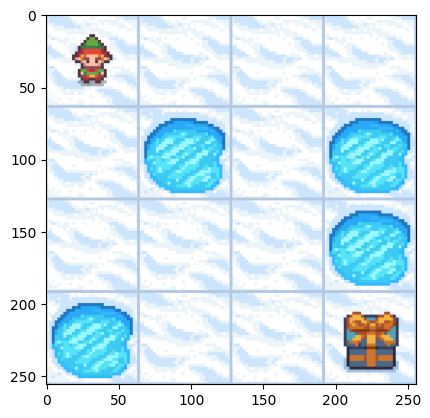

In [205]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import time

from BasicPolicyRelatedTools import EpsilonGreedyPolicy

frozen_lake_env = gym.make("FrozenLake-v1", render_mode='rgb_array', is_slippery=True)
frozen_lake_env.reset()
plt.imshow(frozen_lake_env.render())
print(frozen_lake_env.unwrapped.desc)
print(f"shape of env:{np.array(frozen_lake_env.unwrapped.desc).shape}")

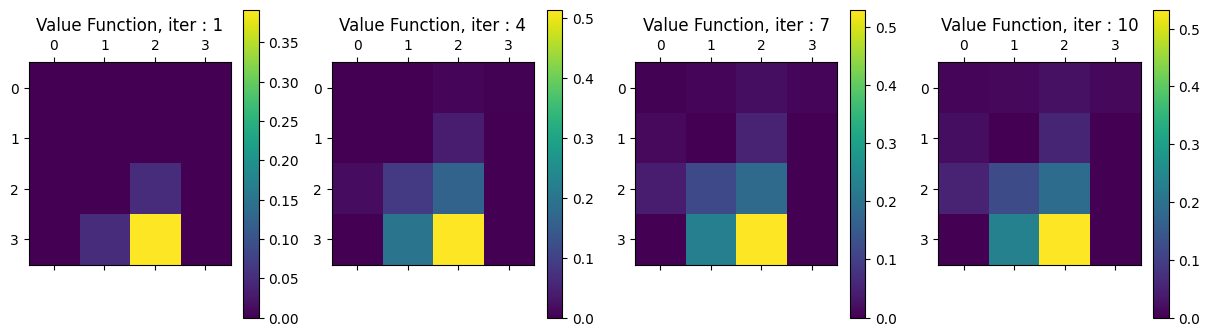

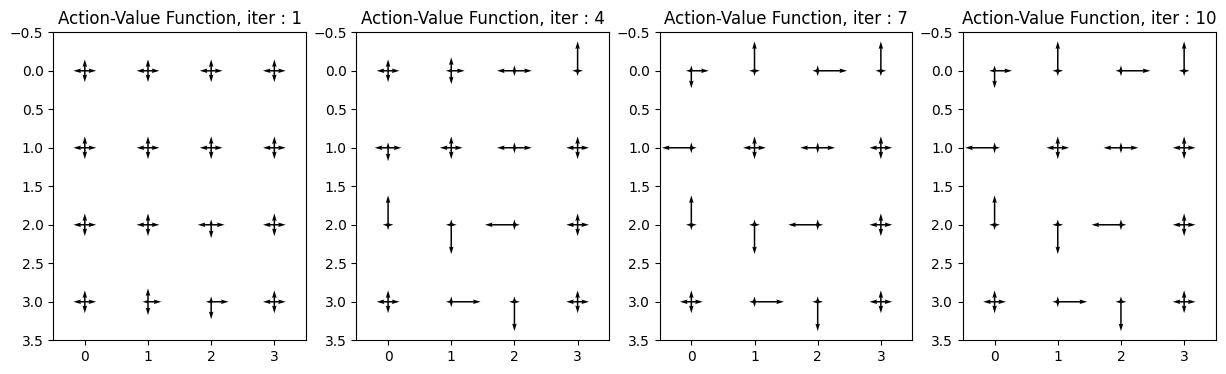

In [212]:
env_dynamic_model = frozen_lake_env.unwrapped.P
policy = EpsilonGreedyPolicy(epsilon=0.05)
gamma = 0.8
n_row, n_col = np.array(frozen_lake_env.unwrapped.desc).shape
state_shape = (n_row, n_col)
n_action = 4

X, Y = np.meshgrid(np.arange(0, n_row, 1), np.arange(0, n_col, 1))

V = np.zeros(state_shape)
Q = np.zeros((n_action, n_row, n_col))

v_fig = plt.figure(figsize=(15,4))
q_fig = plt.figure(figsize=(15,4))
fig_counter = 1
max_iter = 11
for iter in range(max_iter):
    for state in env_dynamic_model:
        i = state//n_row
        j = state%n_row
        pre_V = V.copy()
        pre_Q = Q.copy()
        V[i][j] = 0
        for action in env_dynamic_model[state]:
            Q[action][i][j] = 0
            for transition in env_dynamic_model[state][action]:
                transition_prob, next_state, reward, terminate = transition
                i_next = next_state//n_row
                j_next = next_state%n_row
                if terminate:
                    Q[action][i][j] += transition_prob * (reward)
                else:
                    Q[action][i][j] += transition_prob * (reward + gamma * pre_V[i_next][j_next])
                        
                pi = policy.get_action_probability(np.array([pre_Q[a][i][j] for a in env_dynamic_model[state]]), action)
                V[i][j] += pi * transition_prob * (reward + gamma * pre_V[i_next][j_next])
                
    if not (iter-1)%3 and iter > max_iter-13:
        s_plt = v_fig.add_subplot(1, 4, fig_counter)
        fig = s_plt.matshow(V)
        s_plt.set_title(f"Value Function, iter : {iter}")
        v_fig.colorbar(fig)
        
        s_plt = q_fig.add_subplot(1, 4, fig_counter)
        for state in env_dynamic_model:
            for action in env_dynamic_model[state]:
                i = state//n_row
                j = state%n_row
                pi = policy.get_action_probability(np.array([Q[a][i][j] for a in env_dynamic_model[state]]), action)
                fig = s_plt.quiver(j, i, 1 if action==2 else (-1 if action==0 else 0), 1 if action==3 else (-1 if action==1 else 0), scale=1/(pi*0.1 + 0.02), width=0.006)
        s_plt.set_xlim(-0.5, n_row - 0.5)
        s_plt.set_ylim(-0.5, n_col - 0.5)
        s_plt.invert_yaxis()
        s_plt.set_title(f"Action-Value Function, iter : {iter}")
        
        fig_counter += 1